## Combining the CSV of all Participants

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

sns.boxplot(df[action_r])
sns.plt.show()
print df[action_c].mean()

df.loc[(df.vpn==18), ['conversation_start',
       'neutral_speaker_start', 'neutral_proband_start',
       'neutral_proband_end', 'joy_speaker_start', 'joy_proband_start',
       'joy_proband_end', 'disgust_speaker_start', 'disgust_proband_start',
       'disgust_proband_end']]

In [ ]:
## probably decision for dynamic analysis after looking into the video

### Import of Functions

In [1]:
import os
import pandas as pd
import datetime as dt
import imageio
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
#from keras.models import Sequential, Model

ImportError: No module named seaborn

In [ ]:
! pip seaborn

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show, reset_output
from bokeh.models import CustomJS, Slider

from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

from bokeh.io import curdoc
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.embed import file_html

In [ ]:
import mycharite

### Load dataframe

In [7]:
# load dataframe
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
df=mycharite.aq_charite(df)
df=mycharite.ados_charite(df)

print ('NT ' + str(sum(df.groupby('vpn').mean().asc==0)))
print ('ASC ' + str(sum(df.groupby('vpn').mean().asc==1)))

df=mycharite.exclude_outlier(df)

print ('NT ' + str(sum(df.groupby('vpn').mean().asc==0)))
print ('ASC ' + str(sum(df.groupby('vpn').mean().asc==1)))

df=mycharite.adapt_times(df)

Proband 53 ist korrekt als NT gelabelt
Proband 75 ist falsch als NT gelabelt
NT 43
ASC 37
set()
all participants excluded that were tracked with a successrate less than 0.9
935964
934828
all non-successfully tracked frames excluded
all frames excluded that were tracked with a lower confidence than 0.75
934828
NT 43
ASC 37


### Distribution of AQ in NT and ASC

In [8]:
def aq_distribution(df):
    plt.figure(figsize=(12, 8))  
    sns.distplot(df_aq[df_aq.asc==0].asq, color='darkgreen', kde=False, label='Neurotypical Sample')
    sns.distplot(df_aq[df_aq.asc==1].asq, color='darkblue', kde=False, label='Clinical Sample')
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.ylabel('Number of Participants', fontsize=18)
    plt.xlabel('AQ Values', fontsize=18)
    plt.legend(loc='upper right', fontsize=16)   
    plt.savefig('Distribution.png')
    plt.show()
    plt.close()

### Was the Feature Extraction Successfull and Complete for all Subjects?

In [9]:
def show_success_vpn(df):
    for i in set(df.vpn):
        print i
        print len(df[df.vpn==i])      
        print 'sucess'
        print np.mean(df[df.vpn==i].success)  # Number of sucessfull trackted trials!

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-9-bcf27a6c48d7>, line 3)

### Exclude non-confident trials

In [ ]:
def confidence(df):
    
    plt.close()
    plt.figure(figsize=(6, 5))  
    sns.violinplot(df.confidence)
    plt.yticks(fontsize=18)    
    plt.xticks(fontsize=18)  
    plt.xlabel('Confidence', fontsize=18)
    plt.savefig('Confidence.png')
    plt.show()

    plt.figure(figsize=(12, 8))  
    sns.violinplot(df.success)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Success Rate of all Frames', fontsize=18)
    plt.savefig('Success.png')
    plt.show()

###  Smoothing the Signal

In [ ]:
def smooth(df):
    round_df=df
    for i in set(df.vpn):
        for au in action_r:
            round_df.loc[round_df.vpn==i, au]=round_df.loc[round_df.vpn==i, au].rolling(30, win_type='triang').mean()
    return round_df

In [16]:
round_df=smooth(df)

### Graphic: AUs over Time

In [17]:
#    sns.tsplot(data=final, time="counter", unit="vpn", value="gaze_0_x", color='green')
#    sns.tsplot(data=final, time="counter", unit="vpn", value="gaze_0_y", color='blue')

def graphic(df, var):
    #df=df[df.timepoint<np.mean(df.disgust_proband_end-df.neutral_speaker_start)]

    # Facial Action Unit for Happiness (6,12)
    n=0

    plt.figure(figsize=(12, 8))  
    for i in var:
        colors=['green', 'blue', 'red', 'black']
        g=sns.tsplot(data=df, time="frame", unit="vpn", value=i, 
                   color=colors[n], legend=False)
        n=n+1
    # Facial Action Unit for Disgust (9,15)

        plt.axvspan(df[df.intro==True].min().frame, df[df.intro==True].max().frame,
                        facecolor='r', alpha=0.1)

        plt.axvspan(df[df.neutral_speaker==True].min().frame, df[df.neutral_speaker==True].max().frame,
                        facecolor='y', alpha=0.1)

        plt.axvspan(df[df.neutral_proband==True].min().frame, df[df.neutral_proband==True].max().frame, 
                        facecolor='r', alpha=0.1)

        plt.axvspan(df[df.joy_speaker==True].min().frame, df[df.joy_speaker==True].max().frame,
                        facecolor='y', alpha=0.1)


        plt.axvspan(df[df.joy_proband==True].min().frame, df[df.joy_proband==True].max().frame,
                        facecolor='r', alpha=0.1)

        plt.axvspan(df[df.ekel_speaker==True].min().frame, df[df.ekel_speaker==True].max().frame,
                        facecolor='y', alpha=0.1)

        plt.axvspan(df[df.ekel_proband==True].min().frame, df[df.ekel_proband==True].max().frame,
                        facecolor='r', alpha=0.1)

        plt.ylim(0, 2)
        #sns.plt.xlim(0, 400)
        #sns.set_style("darkgrid", {"axes.facecolor": ".9"})
     #g = sns.lmplot('credibility', 'percentWatched', data=data, hue = 'millennial', markers = ["+", "."], x_jitter = True, y_jitter = True, size=5)
    #fig.set(xlabel = 'Credibility', ylabel = 'Percent of Video Watched [%]')        
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Timecourse (in frames)', fontsize=18) 
    plt.ylabel('Intensity of Action Unit', fontsize=18)
    plt.legend()#loc='upper right', fontsize=16)  
    plt.savefig('Joy.png')
    plt.show()


C:\ProgramData\Anaconda2\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


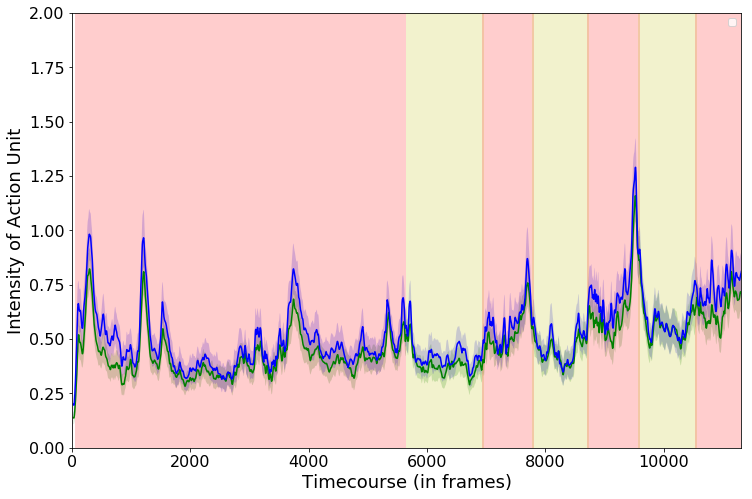

In [18]:
Freude_c=['AU06_c', 'AU12_c']
Ekel_c=['AU09_c', 'AU15_c']
Freude_r=['AU06_r', 'AU12_r']
Ekel_r=['AU09_r', 'AU15_r']
#graphic(df, Freude_c)
#graphic(df, Ekel_c)

graphic(df[df.asc==0].reset_index(drop=True), Freude_r)

In [145]:
def load_VIT_actress_AU():
    VIT=pd.read_csv('./charite/actress_OpenFace_2.0.0_features.csv', sep=',', na_values=['?'])

    di = {"'intro-mit-atempausen.csv'": "intro", 
          "'neutral_proband.csv'": "Pneutral",
          "'neutral_sprecher.csv'":"Sneutral",
          "'joy_proband.csv'":"Pjoy", 
          "'joy_sprecher.csv'":"Sjoy", 
          "'disgust_proband.csv'":"Pdisgust", 
          "'disgust_speaker_new.csv'": "Sdisgust"}

    VIT=VIT.replace({"vpn": di})

    VIT['part']=VIT.vpn.str[1:]
    VIT['who']=VIT.vpn.str[0:1]

    VIT.rename(columns=lambda x: x.replace(" ", ""), inplace=True) 
    return VIT

VIT=load_VIT_actress_AU()

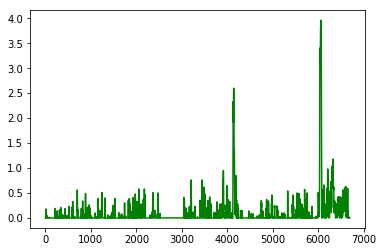

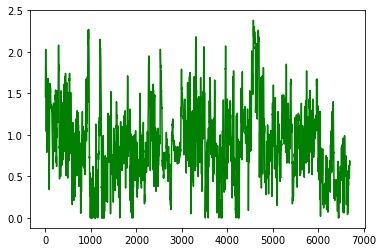

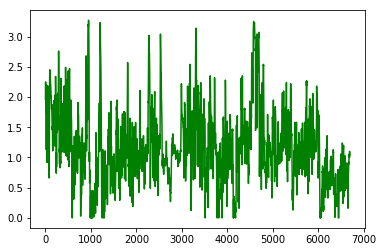

In [146]:
#VIT=pd.read_csv('features.csv', sep=',', na_values=['?'])
def actress_conversation_plot(VIT, var):
    
    intro=np.array(VIT[VIT.vpn=="intro"].reset_index(drop=True)[var])
    neutral=np.array(VIT[VIT.vpn=="Sneutral"].reset_index(drop=True)[var])
    joy=np.array(VIT[VIT.vpn=="Sjoy"].reset_index(drop=True)[var])
    disgust=np.array(VIT[VIT.vpn=="Sdisgust"].reset_index(drop=True)[var])

    conversation_AU_12=np.hstack([intro,neutral,joy,disgust])
    plt.plot(conversation_AU_12, color='green')
    plt.show()
                 
actress_conversation_plot(VIT, 'AU04_r')
actress_conversation_plot(VIT, 'AU06_r')
actress_conversation_plot(VIT, 'AU12_r')

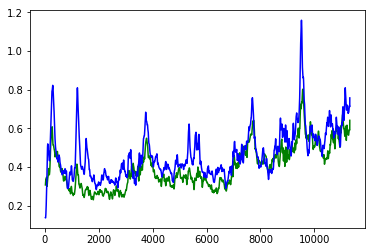

In [67]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU06_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU06_r']), color='blue')
plt.show()

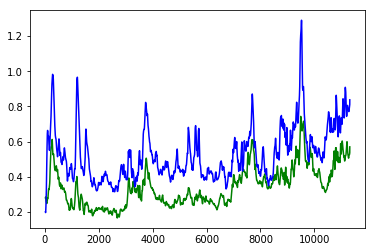

In [66]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU12_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU12_r']), color='blue')
plt.show()

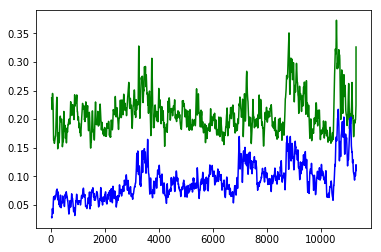

In [76]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU04_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU04_r']), color='blue')
plt.show()

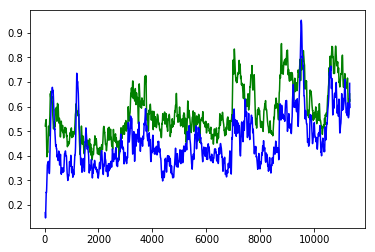

In [83]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU07_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU07_r']), color='blue')
plt.show()

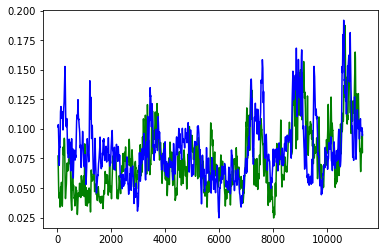

In [77]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU09_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU09_r']), color='blue')
plt.show()

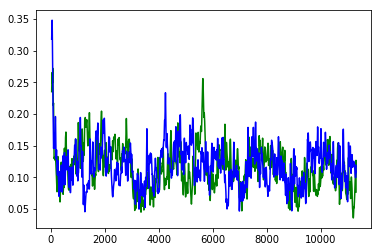

In [85]:
plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['frame']).mean()['AU15_r']), color='green')
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU15_r']), color='blue')
plt.show()

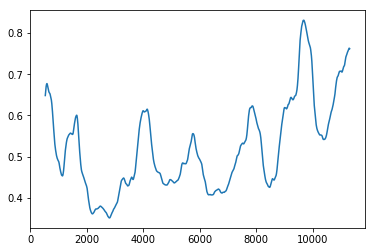

In [64]:
plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['frame']).mean()['AU12_r'].rolling(window=500).mean()))

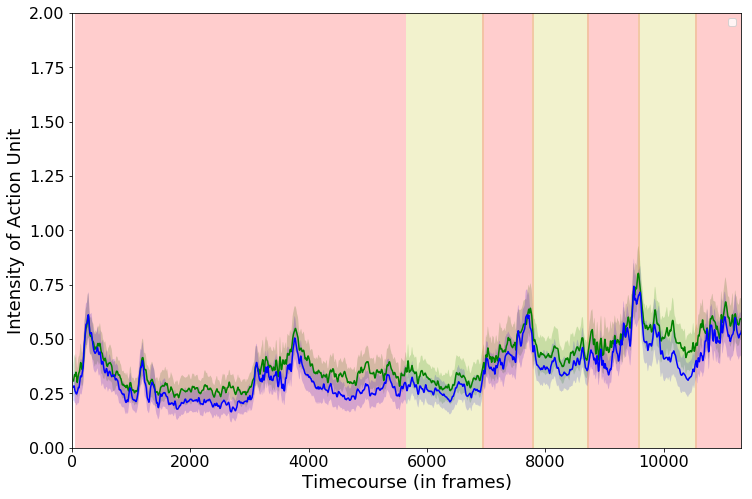

In [20]:
graphic(round_df[round_df.asc==1].reset_index(drop=True), Freude_r)

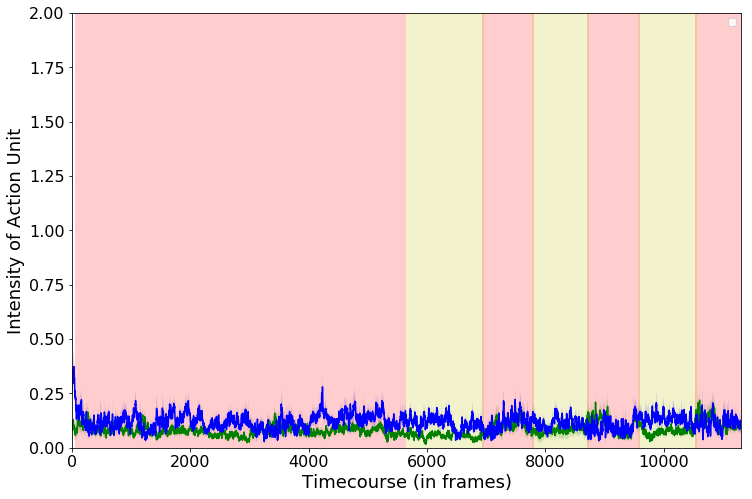

In [18]:
graphic(df[df.asc==0].reset_index(drop=True), Ekel_r)
graphic(df[df.asc==1].reset_index(drop=True), Ekel_r)

### Boxplot of the AUs

## Gaze

In [25]:
def gaze_heat(df, title):
    plt.close()
    sns.kdeplot(df.gaze_angle_x, df.gaze_angle_y, cmap="Reds", shade=True, shade_lowest=False)
    plt.ylim(-0.6, 0.6)
    plt.xlim(-0.2, 0.2)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('X-Angle of Gaze', fontsize=18) 
    plt.ylabel(('Y-Angle of Gaze'), fontsize=18)
    #plt.legend(loc='upper left', fontsize=16)  
    plt.savefig('Gaze_'+ str(title) + '_.png')
    plt.show() 

gaze_heat(df[df.asc==1], 'ASC')
gaze_heat(df[df.asc==0], 'NT')

gaze sollte vermutlich z-standardisiert für jeden Probanden werden, oder?

In [ ]:
def zstand_gaze(df):
    zscore = lambda x: (x - x.mean())
    df.gaze_angle_x=df.groupby('vpn').transform(zscore).gaze_angle_x
    df.gaze_angle_y=df.groupby('vpn').transform(zscore).gaze_angle_y

### Boxplots of AU vs. NT

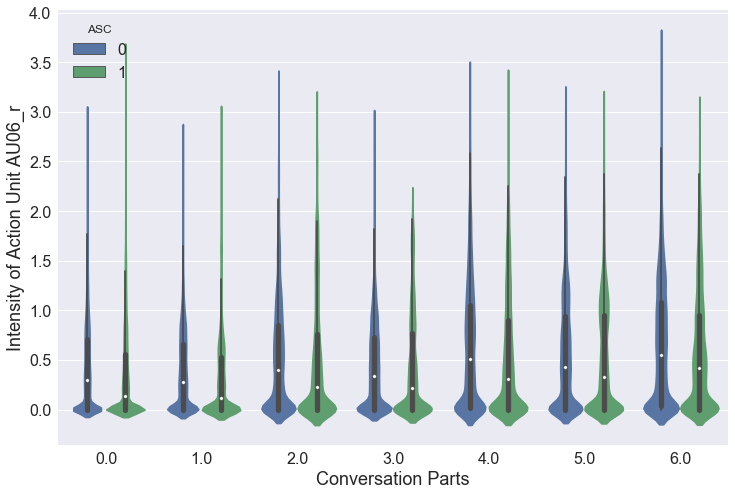

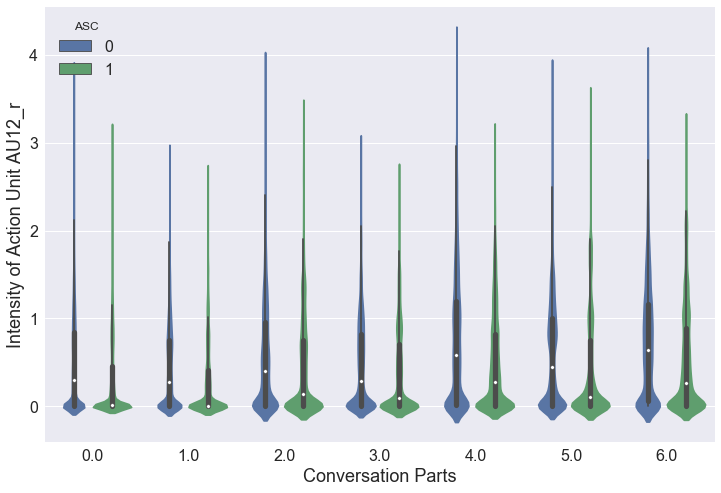

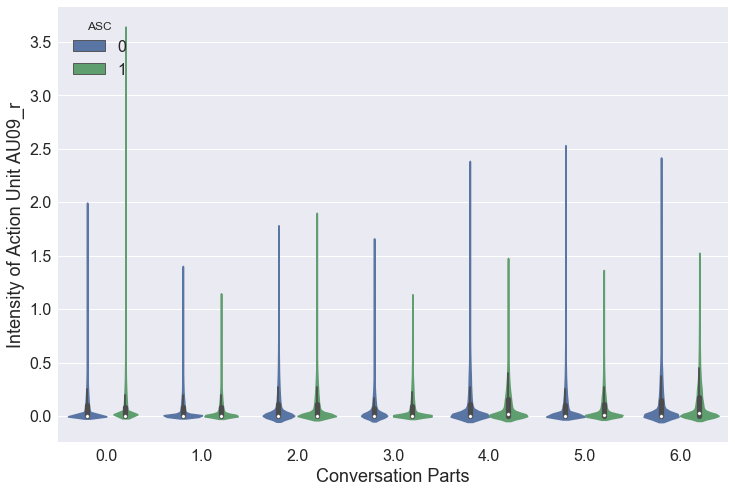

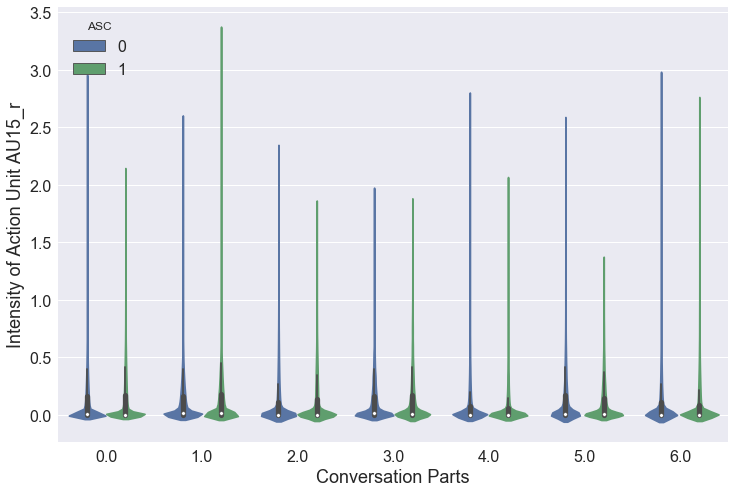

In [53]:
def AUboxplot_ASC_NT(df):
    relevant_AU=['AU06_r', 'AU12_r', 'AU09_r','AU15_r']
    for i in relevant_AU:
        plt.figure(figsize=(12, 8)) 
        fig=sns.violinplot(x='conversation', y=i, hue='asc', data=df)
        plt.yticks(fontsize=16)    
        plt.xticks(fontsize=16)  
        plt.xlabel('Conversation Parts', fontsize=18) 
        plt.ylabel(('Intensity of Action Unit ' + str(i)), fontsize=18)
        plt.legend(title='ASC', loc = "upper left", fontsize=16)
        plt.savefig('AU_'+ str(i) + '_.png')
        #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
        plt.show()

    relevant_AU=['AU06_r', 'AU12_r', 'AU09_r','AU15_r']
    for i in relevant_AU:
        sns.despine(offset=10, trim=True)
        sns.set_style("white")
        plt.figure(figsize=(12, 8)) 
        fig=sns.violinplot(x='asc', y=i, data=df)
        plt.yticks(fontsize=16)    
        plt.xticks(fontsize=16)  
        plt.xlabel('Conversation Parts', fontsize=18) 
        plt.ylabel(('Intensity of Action Unit ' + str(i)), fontsize=18)
        plt.legend(title='ASC', loc = "upper left", fontsize=16)
        plt.savefig('AU_'+ str(i) + '_.png')
        #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
        plt.show()

# for each participant
for i in set(df.vpn):
    print i
    df_vpn=df[df.vpn==i]
    
    #graphic(df)
    
    gaze_heat(df_vpn)

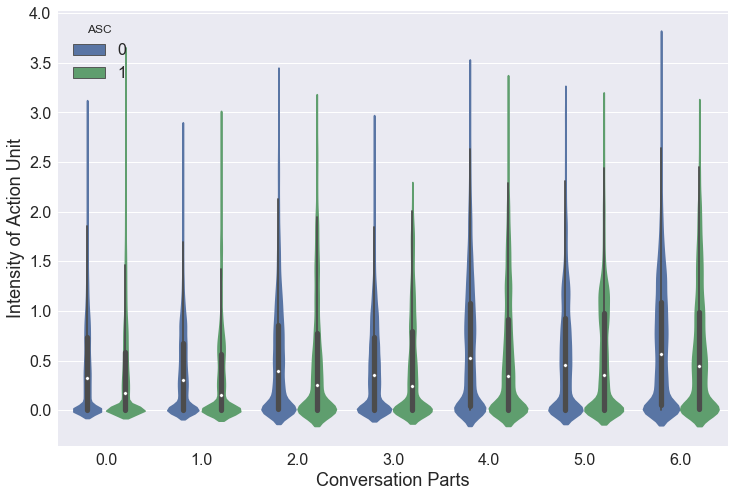

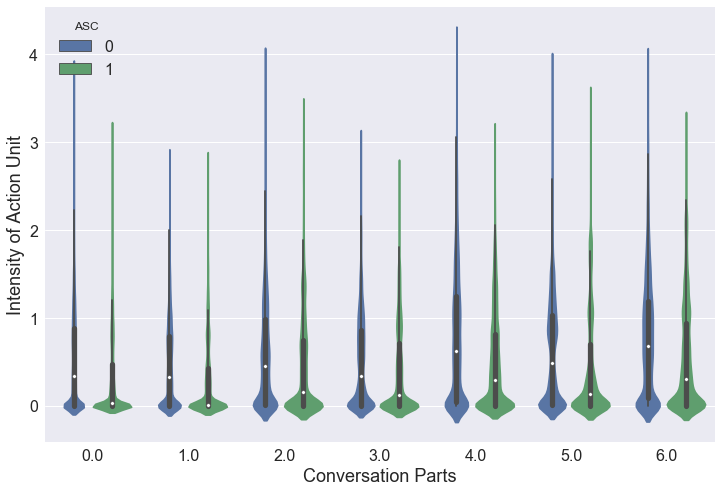

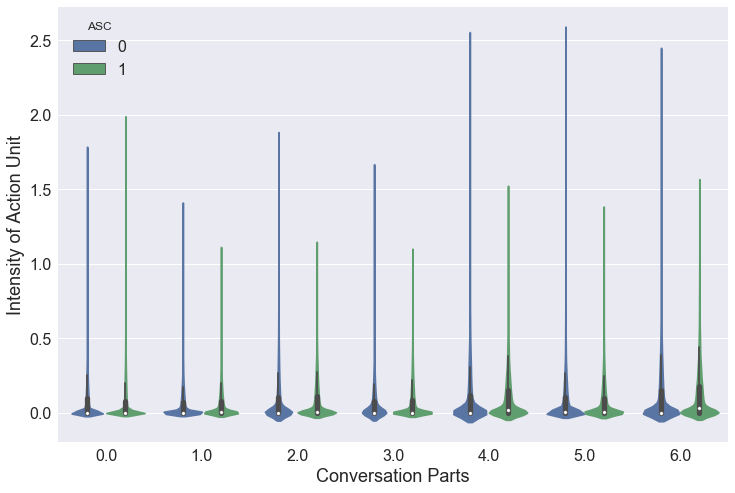

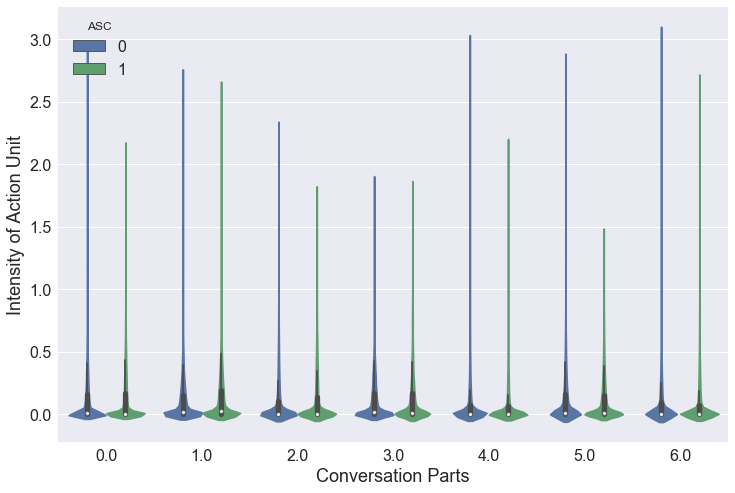

In [33]:
relevant_AU=['AU06_r', 'AU12_r', 'AU09_r','AU15_r']
for i in relevant_AU:
    plt.figure(figsize=(12, 8)) 
    fig=sns.violinplot(x='conversation', y=i, hue='asc', data=df)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Conversation Parts', fontsize=18) 
    plt.ylabel(('Intensity of Action Unit'), fontsize=18)
    plt.legend(title='ASC', loc = "upper left", fontsize=16)
    plt.savefig('AU_'+ str(i) + '_.png')
    #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
    plt.show()

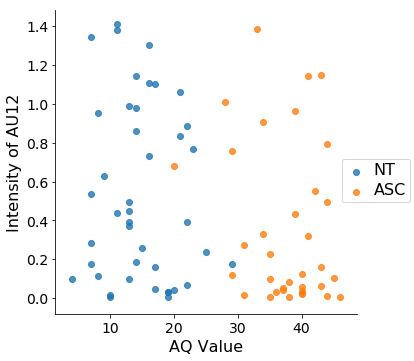

In [21]:
### Correlation of Classifier-Confidence and ASQ
plt.figure(figsize=(10, 8)) 
asq=np.array(df.groupby('vpn').mean().asq)
AU12=np.array(df.groupby('vpn').mean().AU12_r)
asd=np.array(df.groupby('vpn').mean().asc)
#sns.regplot(AU12, asq, hue=asd)#[np.array(test_index, dtype=int)])
df_graphic = pd.DataFrame(dict(asq=asq, AU12=AU12, ASC=asd))
ax=sns.lmplot('asq', 'AU12', data=df_graphic, hue='ASC', fit_reg=False)
#plt.show()
new_labels = ['NT', 'ASC']
new_title = ''
ax._legend.set_title(new_title)
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.setp(ax._legend.texts, fontsize='16')
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
plt.xlabel('AQ Value', fontsize=16) 
plt.ylabel(('Intensity of AU12'), fontsize=16)
plt.savefig('AU12' +'.png')
plt.show()   
plt.close()